In [147]:
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
data = pd.read_csv("jobs.csv")
words_data = data["words"]

0      {'Senior': 1, 'Fullstack': 1, 'would': 1, 'cyb...
1      {'Develux': 2, 'consulting': 1, 'outsourcing':...
2      {'Про': 1, 'проект': 1, 'розробка': 1, 'програ...
3      {'шукаємо': 1, 'кваліфікованого': 1, 'Python':...
4      {'Wht.agency': 1, 'аутсорсингова': 1, 'ІТ': 1,...
                             ...                        
205    {'Job': 2, 'Python': 1, 'FastAPI': 1, 'microse...
206    {'Deloitte': 1, 'engineers': 1, 'automotive': ...
207    {'Required': 1, 'Python': 2, 'Django': 1, 'web...
208    {'leading': 1, 'large': 1, 'Germany': 1, '440,...
209    {'Ajax': 3, 'створюємо': 1, 'системи': 3, 'без...
Name: words, Length: 210, dtype: object

In [161]:
import ast


def parse_dict(serial):
    try:
        return ast.literal_eval(serial)
    except (SyntaxError, ValueError):
        return {}
words_data['Serials'] = data['words'].apply(parse_dict)
words_data = words_data['Serials'].apply(pd.Series)
sums = pd.DataFrame(words_data.sum(), columns=['Total'])
sums['Word'] = sums.index
sums.reset_index(drop=True, inplace=True)
sums= sums[["Word", "Total"]]
sums = sums.sort_values("Total", ascending=False).head(25)


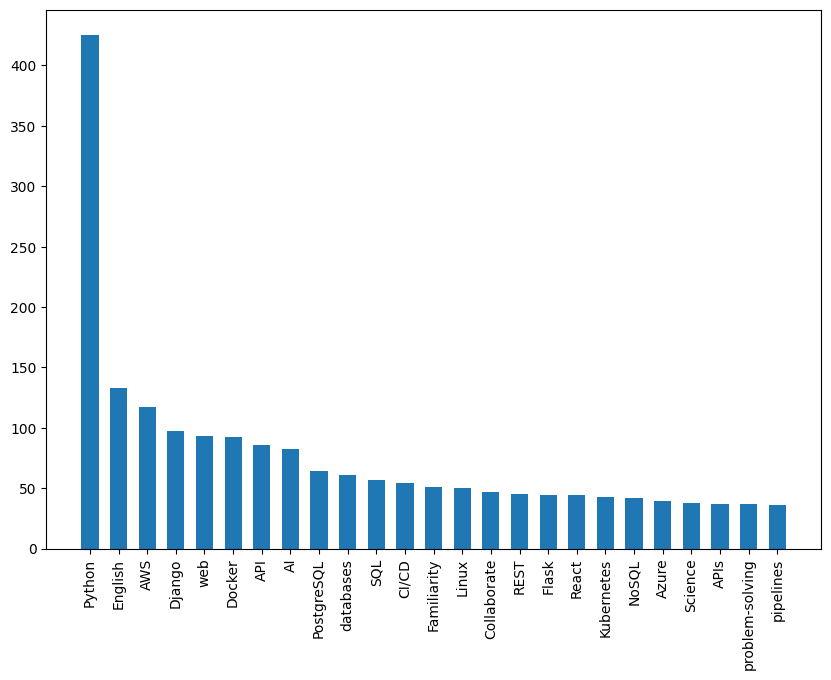

In [163]:
fig = plt.figure(figsize =(10, 7))
plt.bar(sums["Word"], sums["Total"], width = 0.6)
plt.xticks(rotation=90)
plt.show()